<a href="https://colab.research.google.com/github/wellingtonvieira001/Comunidade_SST/blob/main/Analise_de_dados_de_mercado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from datetime import datetime
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import matplotlib as mtl
import numpy as np
import seaborn as sns



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
from google.colab import files
file_path = files.upload()

KeyboardInterrupt: 

In [8]:
df = pd.read_csv('/content/online-retail-dataset.csv')


In [9]:
df.shape

(37746, 8)

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.isnull().sum()

InvoiceNo          0
StockCode          0
Description      117
Quantity           1
InvoiceDate        1
UnitPrice          1
CustomerID     12910
Country            1
dtype: int64

In [19]:
import numpy as np
df['UnitPrice'].mean()


6.192570936547888

In [22]:
retail_data = df

In [23]:
# prompt: mude o formato da data da coluna  'InvoiceDate' para dia, mês e ano, horas , minutos

retail_data['InvoiceDate'] = pd.to_datetime(retail_data['InvoiceDate'])
retail_data['day'] = retail_data['InvoiceDate'].dt.day
retail_data['month'] = retail_data['InvoiceDate'].dt.month
retail_data['year'] = retail_data['InvoiceDate'].dt.year
retail_data['hour'] = retail_data['InvoiceDate'].dt.hour
retail_data['minute'] = retail_data['InvoiceDate'].dt.minute


In [24]:
df['Country'].describe()

count              37745
unique                23
top       United Kingdom
freq               35813
Name: Country, dtype: object

<Axes: >

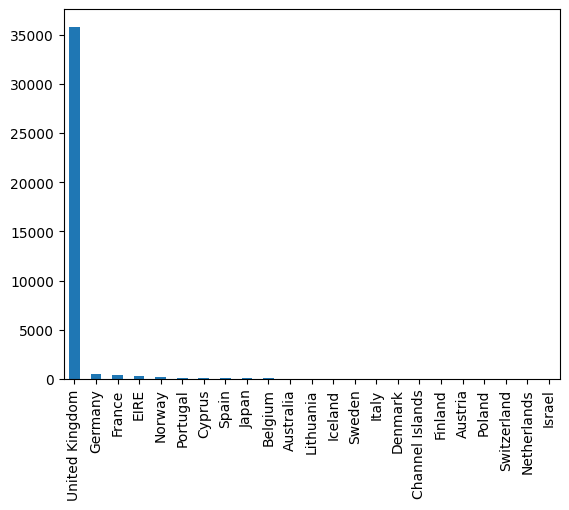

In [25]:
df['Country'].value_counts().plot(kind='bar')

In [26]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,hour,minute
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1.0,12.0,2010.0,8.0,26.0
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,8.0,26.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1.0,12.0,2010.0,8.0,26.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,8.0,26.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1.0,12.0,2010.0,8.0,26.0


In [27]:
retail_data = retail_data[retail_data['Quantity'] > 0]

In [28]:
retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']
retail_data = retail_data.dropna(subset=['CustomerID'])
retail_data['CustomerID'] = retail_data['CustomerID'].astype(int)

<ipython-input-28-509273f4585b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['TotalPrice'] = retail_data['Quantity'] * retail_data['UnitPrice']
<ipython-input-28-509273f4585b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  retail_data['CustomerID'] = retail_data['CustomerID'].astype(int)


In [29]:
retail_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,day,month,year,hour,minute,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,2010-12-01 08:26:00,2.55,17850,United Kingdom,1.0,12.0,2010.0,8.0,26.0,15.30
1,536365,71053,WHITE METAL LANTERN,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.0,12.0,2010.0,8.0,26.0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,2010-12-01 08:26:00,2.75,17850,United Kingdom,1.0,12.0,2010.0,8.0,26.0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.0,12.0,2010.0,8.0,26.0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,2010-12-01 08:26:00,3.39,17850,United Kingdom,1.0,12.0,2010.0,8.0,26.0,20.34


In [30]:
retail_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
day            0
month          0
year           0
hour           0
minute         0
TotalPrice     0
dtype: int64

In [32]:
# RFM Calculation
reference_date = retail_data['InvoiceDate'].max() + pd.Timedelta(days=1)
rfm_data = retail_data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalPrice': 'sum'
}).rename(columns={'InvoiceDate': 'CompRecentes', 'InvoiceNo': 'FreqCompras', 'TotalPrice': 'TotalCompras'})

In [39]:
retail_data.shape

(24272, 14)

In [40]:
retail_data.describe()

,Quantity,UnitPrice,CustomerID,day,month,year,hour,minute,TotalPrice
count,24272.000000,24272.000000,24272.000000,24272.000000,24272.0,24272.0,24272.000000,24272.000000,24272.000000
mean,11.561676,3.117230,15556.399225,8.625124,12.0,2010.0,12.880438,30.570163,21.633373
std,45.234586,5.140511,1734.236297,5.028459,0.0,0.0,2.238481,16.938282,78.610092
min,1.000000,0.000000,12347.000000,1.000000,12.0,2010.0,7.000000,0.000000,0.000000
25%,2.000000,1.250000,14256.000000,5.000000,12.0,2010.0,11.000000,17.000000,3.900000
50%,4.000000,2.100000,15574.000000,8.000000,12.0,2010.0,13.000000,31.000000,10.200000
75%,12.000000,3.750000,17191.000000,13.000000,12.0,2010.0,14.000000,45.000000,19.500000
max,2880.000000,295.000000,18269.000000,19.000000,12.0,2010.0,20.000000,59.000000,3828.000000


In [41]:
# Normalizing the RFM data for K-Means
scaler = StandardScaler()
rfm_normalized = scaler.fit_transform(rfm_data[['CompRecentes', 'FreqCompras', 'TotalCompras']])

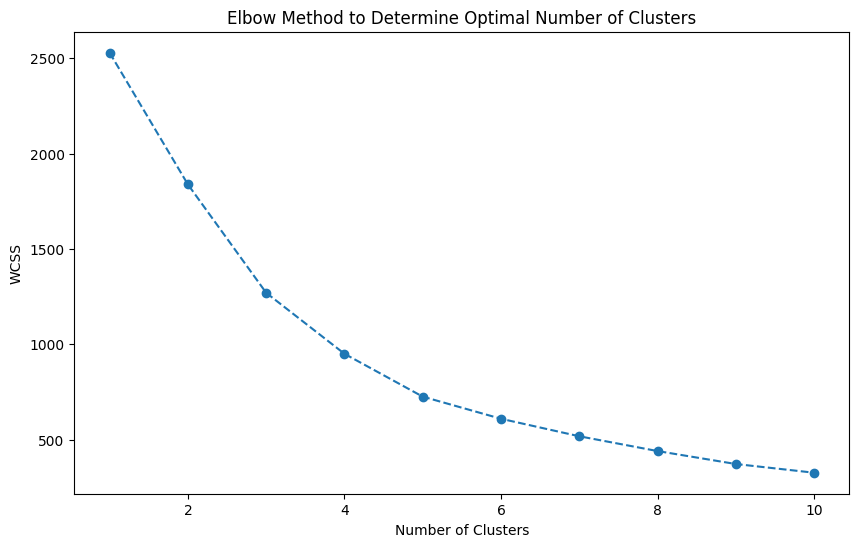

In [42]:
# Determining the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(rfm_normalized)
    wcss.append(kmeans.inertia_)
# Plotting the results to find the 'elbow'
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters = kmeans.fit_predict(rfm_normalized)
rfm_data['Cluster'] = clusters
rfm_data

,CompRecentes,FreqCompras,TotalCompras,Cluster
CustomerID,,,,
12347,13,31,711.79,1
12348,3,17,892.80,0
12370,3,91,1868.02,0
12386,12,8,258.90,1
12395,2,31,679.92,0
...,...,...,...,...
18239,17,29,438.10,1
18245,1,6,86.50,0
18259,12,7,376.30,1


In [46]:
# Analyzing the Clusters
cluster_analysis = rfm_data.groupby('Cluster').agg({
    'CompRecentes': 'mean',
    'FreqCompras': 'mean',
    'TotalCompras': 'mean'
}).sort_values(by='Cluster', ascending=True)
cluster_analysis['Count'] = rfm_data.groupby('Cluster').size()
cluster_analysis

,CompRecentes,FreqCompras,TotalCompras,Count
Cluster,,,,
0,4.910864,27.980501,642.110390,359
1,14.120614,21.745614,384.657412,456
2,6.666667,56.666667,20139.463333,3
3,7.320000,165.640000,2349.816800,25


In [53]:
cluster_analysis.describe()

,CompRecentes,FreqCompras,TotalCompras,Count
count,4.000000,4.000000,4.000000,4.000000
mean,8.254536,68.008196,5879.011984,210.750000
std,4.040862,66.840712,9546.880150,230.787601
min,4.910864,21.745614,384.657412,3.000000
25%,6.227716,26.421780,577.747146,19.500000
50%,6.993333,42.323584,1495.963595,192.000000
75%,9.020154,83.910000,6797.228433,383.250000
max,14.120614,165.640000,20139.463333,456.000000
